# Data Quality

## Autor: Cecilia Conde
## Fecha de última modificación: <ie: 29/10/2024>
## Descripción:

< Completar >

## Parámetros

< Descripción de cada uno de los parámetros que utiliza el job >


In [ ]:

#Constantes.
#semillas y valores de ganancia
semilla=[100183,200003,300017,700001,800011]
ganancia_acierto = 273000
costo_estimulo = 7000

#meses
mes_train_all = [201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
                 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004,
                 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012,
                 202101, 202102, 202103, 202104, 202105, 202106]

mes_train_6 = [202101, 202102, 202103, 202104, 202105, 202106]
pre_post_pandemia = [201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202101, 202102, 202103, 202104, 202105, 202106]
mes_train_10 = [202010, 202011, 202012,
                 202101, 202102, 202103, 202104, 202105, 202106] # saco post analisis de diferencia
mes_train_5 = [202101, 202102, 202103, 202104, 202105]
mes_train_12 = [202006, 202007, 202008, 202009, 202010, 202011, 202012,
                 202101, 202102, 202103, 202104, 202105, 202106]
mes_test = 202108


In [6]:
#Librerías.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Input

In [4]:
#Pah de trabajo.
#seteo carpeta de trabajo y archivo
dataset_path = '/home/ingceciliaconde/buckets/b1/datasets'
dataset_file = 'competencia_02.csv.gz' #archivo de datos


In [7]:
#path de trabajo local para pruebas
#seteo carpeta de trabajo y archivo
dataset_path = 'C:/Users/mconde/Documents/DMEYF/Competencia_01'
dataset_file = 'competencia_01.csv'


## Output

In [ ]:
# path de salida
dataset_out = dataset_path +'/'+ 'competencia_02_QA.csv.gz'
dataset_out_1 = dataset_path +'/'+ 'competencia_02_QA_deflacion.csv.gz'


## Código del proceso

< Todo el código a partir de aquí debe poder ejecutarse sin necesidad de parametrizar nada>

In [8]:
#Lectura de datos.
df = pd.read_csv(f"{dataset_path}/{dataset_file}") #pruebas locales

In [8]:
print(df.shape)

(981946, 155)


In [9]:
#cantida de registros segun clase ternara
df['clase_ternaria'].value_counts()

clase_ternaria
CONTINUA    645053
BAJA+1        4614
BAJA+2        3972
Name: count, dtype: int64

In [9]:
data= df.copy()
data.shape

(981946, 155)

In [ ]:
#definir train
#mes_train=mes_train_all # cambiar a 12 para entrenar con 12 meses o con all para entrenar con todos los meses

In [ ]:
#a. Evaluamos en train y test
#a. Evaluamos en train y test
train_data_12 = data[data['foto_mes'].isin(mes_train_12)] #train_data = data[data['foto_mes']= 202104]
train_data_pos = data[data['foto_mes'].isin(pre_post_pandemia)]
train_data_all = data[data['foto_mes'].isin(mes_train_all)]
train_data_mejorado = data[data['foto_mes'].isin(train_mejorado)]
score_data = data[data['foto_mes'] == mes_test]
#score_data = data[data['foto_mes'] == 202106]

In [ ]:
# X_train = train_data
X_test = score_data
print(train_data_12.shape)
print(train_data_pos.shape)
print(train_data_all.shape)
print(X_test.shape)

(817070, 155)
(164876, 155)


# Funciones

In [28]:
# data quality check
# media, mediana, moda, desviación estándar, mínimo, máximo, cuartiles, valores únicos, valores nulos
def data_quality(datos):
    # Crear un DataFrame con estadísticas descriptivas
    data_quality = datos.describe().T
    
    # Agregar métricas adicionales
    data_quality['missing'] = datos.isnull().sum()
    data_quality['missing_%'] = data_quality['missing'] / datos.shape[0]
    data_quality['nunique'] = datos.nunique()
    data_quality['cv'] = data_quality['std'] / data_quality['mean']
    data_quality['ceros'] = (datos == 0).sum()
    data_quality['ceros_%'] = data_quality['ceros'] / datos.shape[0]
    
    return data_quality



In [ ]:
# Aplicar la función al subset X_train
quality_train_12 = data_quality(train_data_12)  
quality_train_pos = data_quality(train_data_pos)
quality_train_all = data_quality(train_data_all)
quality_train_mejorado = data_quality(train_data_mejorado)

# Aplicar la función al subset X_test
quality_test = data_quality(X_test)

# Mostrar los resultados
print(quality_train_12.shape)
print(quality_train_pos.shape)
print(quality_train_all.shape)
print(quality_test.shape)




(154, 14)
(154, 14)


In [ ]:
quality_train_12.sort_values('ceros_%', ascending=False) #cambiar segun subset

,count,mean,std,min,25%,50%,75%,max,missing,missing_%,nunique,cv,ceros,ceros_%
mcuenta_corriente_adicional,817070.0,4.379269e+01,8.008543e+03,-1.990016e+06,0.0,0.0,0.000000e+00,4.243127e+06,0,0.000000,368,182.873962,816562,0.999378
cpayroll2_trx,817070.0,1.506603e-03,5.770939e-02,0.000000e+00,0.0,0.0,0.000000e+00,6.000000e+00,0,0.000000,7,38.304316,816232,0.998974
mpayroll2,817070.0,7.854215e+01,3.570633e+03,0.000000e+00,0.0,0.0,0.000000e+00,1.682828e+06,0,0.000000,679,45.461355,816232,0.998974
mcheques_emitidos_rechazados,817070.0,1.834050e+02,1.097242e+04,0.000000e+00,0.0,0.0,0.000000e+00,3.519000e+06,0,0.000000,903,59.826177,815593,0.998192
ccheques_emitidos_rechazados,817070.0,2.636249e-03,1.105869e-01,0.000000e+00,0.0,0.0,0.000000e+00,5.400000e+01,0,0.000000,19,41.948593,815593,0.998192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ccaja_ahorro,817070.0,2.127831e+00,4.761841e-01,2.000000e+00,2.0,2.0,2.000000e+00,1.000000e+01,0,0.000000,9,0.223788,0,0.000000
Master_fultimo_cierre,732037.0,4.276735e+00,8.111367e+00,-3.000000e+00,1.0,4.0,5.000000e+00,3.327000e+03,85033,0.104071,48,1.896626,0,0.000000
Master_mlimitecompra,732445.0,3.828080e+05,5.517870e+05,9.853200e+02,98532.0,197064.0,4.855428e+05,1.064483e+07,84625,0.103571,480,1.441420,0,0.000000
Master_Fvencimiento,732445.0,-1.031246e+03,7.634670e+03,-2.914237e+06,-1460.0,-879.0,-5.170000e+02,5.176000e+03,84625,0.103571,393,-7.403348,0,0.000000


In [57]:
quality_test.sort_values('ceros_%', ascending=False)

,count,mean,std,min,25%,50%,75%,max,missing,missing_%,nunique,cv,ceros,ceros_%
mcuenta_corriente_adicional,164876.0,9.722403e+01,1.826363e+04,-5.834191e+04,0.0,0.0,0.000000e+00,6.581942e+06,0,0.000000,99,187.850976,164778,0.999406
mpayroll2,164876.0,1.182061e+02,5.386123e+03,0.000000e+00,0.0,0.0,0.000000e+00,1.317033e+06,0,0.000000,184,45.565510,164664,0.998714
cpayroll2_trx,164876.0,1.989374e-03,6.830993e-02,0.000000e+00,0.0,0.0,0.000000e+00,5.000000e+00,0,0.000000,6,34.337404,164664,0.998714
mcheques_emitidos_rechazados,164876.0,2.448286e+02,2.091431e+04,0.000000e+00,0.0,0.0,0.000000e+00,5.960435e+06,0,0.000000,217,85.424301,164602,0.998338
ccheques_emitidos_rechazados,164876.0,2.201655e-03,6.327915e-02,0.000000e+00,0.0,0.0,0.000000e+00,6.000000e+00,0,0.000000,7,28.741633,164602,0.998338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Master_fechaalta,148182.0,2.551768e+03,1.909239e+03,1.000000e+00,786.0,2206.0,3.838000e+03,7.693000e+03,16694,0.101252,4753,0.748203,0,0.000000
Master_mlimitecompra,148182.0,3.867340e+05,5.620999e+05,1.231650e+03,98532.0,197064.0,5.054692e+05,1.078334e+07,16694,0.101252,134,1.453453,0,0.000000
foto_mes,164876.0,2.021060e+05,0.000000e+00,2.021060e+05,202106.0,202106.0,2.021060e+05,2.021060e+05,0,0.000000,1,0.000000,0,0.000000
Master_Fvencimiento,148182.0,-1.015109e+03,7.593559e+03,-2.914087e+06,-1460.0,-913.0,-4.560000e+02,5.206000e+03,16694,0.101252,137,-7.480534,0,0.000000


In [ ]:
#diferencia de medidas de resumen

diferencia_medidas_12= quality_train_12- quality_test
diferencia_medidas_12.sort_values('ceros_%', ascending=False)

,count,mean,std,min,25%,50%,75%,max,missing,missing_%,nunique,cv,ceros,ceros_%
Master_cadelantosefectivo,258666.0,0.000133,0.008338,0.0,0.0,0.0,0.0,17.00,393528,0.015002,8,0.380254,257793,-0.014903
Master_cconsumos,258666.0,-0.440170,-0.921198,0.0,0.0,0.0,0.0,41.00,393528,0.015002,11,-0.043615,82365,-0.000571
Master_mconsumosdolares,258666.0,-4.723197,-55.334517,0.0,0.0,0.0,0.0,-883.74,393528,0.015002,3836,1.763390,239859,-0.011039
Master_madelantopesos,258666.0,-0.595262,-32.740335,0.0,0.0,0.0,0.0,138.26,393528,0.015002,77,-0.557429,257793,-0.014903
Master_madelantodolares,258666.0,-0.005437,-0.847591,0.0,0.0,0.0,0.0,15.00,393528,0.015002,40,-6.374797,258626,-0.015002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Visa_delinquency,619880.0,0.009839,0.046611,0.0,0.0,0.0,0.0,0.00,32314,-0.000450,0,-4.664210,608262,-0.008904
mtarjeta_visa_descuentos,641082.0,-51.525592,-269.366151,0.0,0.0,0.0,0.0,79893.74,11112,-0.000648,12379,2.779240,619697,0.008369
Master_Finiciomora,3566.0,-14.318589,-14.668869,-1.0,-7.0,-3.0,-10.0,-30.00,648628,-0.001140,58,-0.071386,-3,-0.000023
mtarjeta_master_descuentos,637517.0,-25.833312,-207.098110,0.0,0.0,0.0,0.0,50610.84,14677,-0.003445,4030,8.599576,631196,0.007468


In [ ]:
diferencia_medidas_all= quality_train_all- quality_test
diferencia_medidas_all.sort_values('ceros_%', ascending=False) 

In [ ]:
diferencia_medidas_pos= quality_train_pos- quality_test
diferencia_medidas_pos.sort_values('ceros_%', ascending=False)

In [ ]:
diferencia_medidas_mejorado= quality_train_mejorado- quality_test
diferencia_medidas_mejorado.sort_values('ceros_%', ascending=False)

In [ ]:
#hacer un frame y guardar para cada foto_mes ld diferencia de quality entre ese fot_mes y el tes
estadisticas_quality = pd.DataFrame()

for foto_mes in data['foto_mes'].unique():
    print(foto_mes)
    train_data = data[data['foto_mes'] == foto_mes]
    quality_train = data_quality(train_data)
    test_data = data[data['foto_mes'] == 202108]
    quality_test = data_quality(test_data)
    quality_test['foto_mes'] = foto_mes
    quality_test['diferencia'] = quality_test['ceros_%'] - quality_train['ceros_%']
    estadisticas_quality = pd.concat([estadisticas_quality, quality_test])

202101
202102
202103
202104
202105
202106


In [1]:
quality_test.sort_values(by='diferencia', ascending=False)

NameError: name 'quality_test' is not defined

In [143]:
estadisticas_quality.sort_values(by='diferencia', ascending=False)

,count,mean,std,min,25%,50%,75%,max,missing,missing_%,nunique,cv,ceros,ceros_%,foto_mes,diferencia
Master_fultimo_cierre,148139.0,2.513835,1.038037e+01,0.0,0.000,0.0,0.000,3.388000e+03,16737,0.101513,14,4.129298,113586,0.688918,202104,0.688918
Master_fultimo_cierre,148139.0,2.513835,1.038037e+01,0.0,0.000,0.0,0.000,3.388000e+03,16737,0.101513,14,4.129298,113586,0.688918,202101,0.688918
Master_fultimo_cierre,148139.0,2.513835,1.038037e+01,0.0,0.000,0.0,0.000,3.388000e+03,16737,0.101513,14,4.129298,113586,0.688918,202103,0.688918
Master_fultimo_cierre,148139.0,2.513835,1.038037e+01,0.0,0.000,0.0,0.000,3.388000e+03,16737,0.101513,14,4.129298,113586,0.688918,202105,0.688918
Master_fultimo_cierre,148139.0,2.513835,1.038037e+01,0.0,0.000,0.0,0.000,3.388000e+03,16737,0.101513,14,4.129298,113586,0.688918,202102,0.688918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ctransferencias_emitidas,164876.0,3.263210,5.315425e+00,0.0,0.000,1.0,5.000,2.720000e+02,0,0.000000,120,1.628895,63205,0.383349,202101,-0.074269
mtransferencias_emitidas,164876.0,72065.689741,5.426050e+05,0.0,0.000,9032.1,47606.855,9.475963e+07,0,0.000000,54784,7.529311,63205,0.383349,202101,-0.074269
cmobile_app_trx,164876.0,0.763161,4.251437e-01,0.0,1.000,1.0,1.000,1.000000e+00,0,0.000000,2,0.557082,39049,0.236839,202101,-0.074803
mtransferencias_recibidas,164876.0,155586.015539,1.353114e+06,0.0,731.655,42697.2,140799.355,2.681816e+08,0,0.000000,79230,8.696886,40071,0.243037,202101,-0.078880


<Axes: xlabel='foto_mes', ylabel='diferencia'>

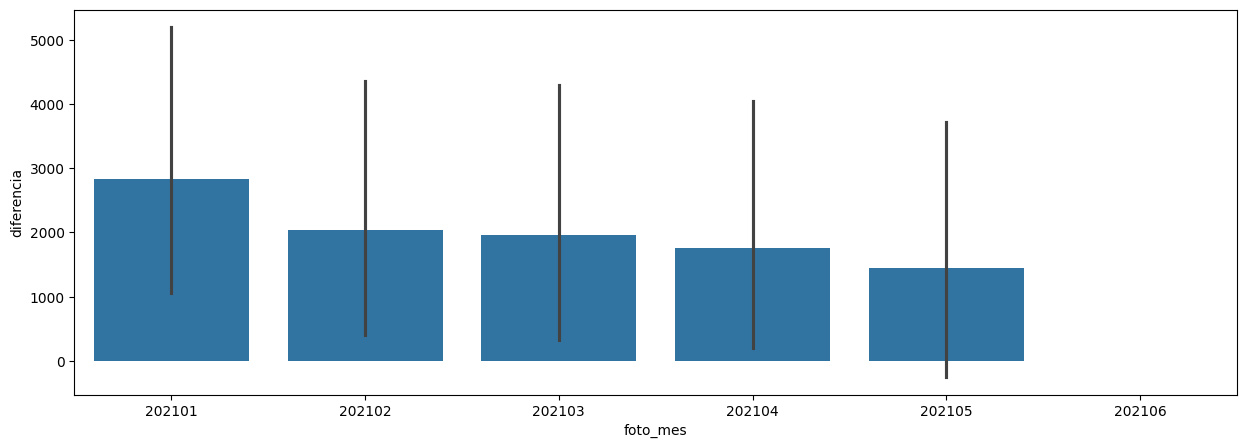

In [ ]:
#grafcarstadisticas_quality
plt.figure(figsize=(15, 5))
sns.barplot(data=estadisticas_quality, x='foto_mes', y='diferencia')
plt.xticks(rotation=90)
plt.title('Diferencia de % de ceros entre cada mes y el mes de test')
plt.show()


In [104]:
#hacer la un salida que sea la diferencia entre las variables de quality_test y quality_train
quality_diferencias=quality_test- quality_train
quality_diferencias.sort_values(by='cv', ascending=False)


,count,mean,std,min,25%,50%,75%,max,missing,missing_%,nunique,cv,ceros,ceros_%
mcheques_emitidos_rechazados,-652194.0,61.423572,9.941891e+03,0.00,0.0,0.0,0.000,2.441435e+06,0,0.000000,-686,25.598124,-650991,0.000146
mpagodeservicios,-652194.0,2.442843,2.973516e+03,0.00,0.0,0.0,0.000,1.046635e+06,0,0.000000,-4667,16.752267,-647118,-0.000957
mcuenta_debitos_automaticos,-652194.0,2021.532093,1.399221e+05,0.00,0.0,0.0,177.075,1.753409e+04,0,0.000000,-145715,13.485865,-342051,0.005552
Master_madelantodolares,-258666.0,0.005437,8.475906e-01,0.00,0.0,0.0,0.000,-1.500000e+01,-393528,-0.015002,-40,6.374797,-258626,0.015002
ccajas_depositos,-652194.0,-0.027229,-1.940531e-01,0.00,0.0,0.0,0.000,-4.200000e+01,0,0.000000,-21,5.922620,-633016,0.019207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mtarjeta_master_descuentos,-637517.0,25.833312,2.070981e+02,0.00,0.0,0.0,0.000,-5.061084e+04,-14677,0.003445,-4030,-8.599576,-631196,-0.007468
ccheques_emitidos_rechazados,-652194.0,-0.000435,-4.730779e-02,0.00,0.0,0.0,0.000,-4.800000e+01,0,0.000000,-12,-13.206960,-650991,0.000146
Master_msaldodolares,-584263.0,191.604512,3.374288e+03,39268.31,0.0,0.0,0.000,9.636489e+04,-67931,-0.002319,-11199,-14.408284,-561708,-0.001864
mforex_buy,-652194.0,-0.364885,-6.428476e+01,0.00,0.0,0.0,0.000,-5.101776e+04,0,0.000000,-877,-19.449258,-649660,0.000477


In [ ]:
def diferencia_quality(datos):
    df_quality['diff_mean'] = df_quality['mean_train'] - df_quality['mean_test']
    df_quality['diff_std'] = df_quality['std_train'] - df_quality['std_test']
    df_quality['diff_missing_%'] = df_quality['missing_%_train'] - df_quality['missing_%_test']
    df_quality['diff_nunique'] = df_quality['nunique_train'] - df_quality['nunique_test']
    df_quality['diff_cv'] = df_quality['cv_train'] - df_quality['cv_test']
    df_quality['diff_ceros'] = df_quality['ceros_train'] - df_quality['ceros_test']
    return diferencia_quality

In [ ]:
# #Cantidad de movimientos voluntarios en las cuentas bancarias ( no tarjeta de credito ) que el cliente realizó en los ultimos 90 dias.
# plt.figure(figsize=(10, 6))
# sns.kdeplot(data=df_1[df_04['clase_ternaria'] == 'BAJA+1'], x='ctrx_quarter', fill=True, color='orange' )
# sns.kdeplot(data=df_2[df_04['clase_ternaria'] == 'BAJA+2'], x='ctrx_quarter', fill=True, color='green')
# #sns.kdeplot(data=df_04[df_04['clase_ternaria'] == 'CONTINUA'], x='ctrx_quarter', fill=True, color='blue')

In [ ]:
import pandas as pd
import numpy as np

def check_data_quality_by_foto_mes(df, dataset_name="Dataset"):
    # Iterar sobre cada valor único en la columna foto_mes
    for month in sorted(df['foto_mes'].unique()):
        print(f"\n--- Verificando calidad de datos para {dataset_name} - Foto Mes: {month} ---")
        
        # Filtrar datos del mes actual
        monthly_data = df[df['foto_mes'] == month]
        
        # Resumen general
        print("\nInformación general del mes:")
        print(monthly_data.info())
        
        # Valores nulos
        nulls = monthly_data.isnull().sum()
        print("\nValores nulos por columna:")
        print(nulls[nulls > 0])
        
        # Duplicados
        duplicates = monthly_data.duplicated().sum()
        print(f"\nRegistros duplicados: {duplicates}")
        
        # Outliers (usando rango intercuartil - IQR)
        def detect_outliers(column):
            if np.issubdtype(column.dtype, np.number):
                Q1 = column.quantile(0.25)
                Q3 = column.quantile(0.75)
                IQR = Q3 - Q1
                return ((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))).sum()
            return 0
        
        outliers = {col: detect_outliers(monthly_data[col]) for col in monthly_data.columns}
        print("\nOutliers detectados por columna:")
        print({k: v for k, v in outliers.items() if v > 0})
        
        # Estadísticas descriptivas
        print("\nEstadísticas descriptivas:")
        print(monthly_data.describe())

# Uso con DataFrame
# Supongamos que ya tienes una columna llamada "foto_mes"
check_data_quality_by_foto_mes(X_train, dataset_name="X_train (Referencia)")
check_data_quality_by_foto_mes(X_test, dataset_name="X_test (Actual)")


## B. Data Quality.

#### 1. Valores nulos.

In [96]:
#evaluamos valores nulos
train_null_percentage = train_data.isnull().mean() * 100
score_null_percentage = score_data.isnull().mean() * 100

comparison_df = pd.DataFrame({'Train Null Percentage': train_null_percentage, 'Score Null Percentage': score_null_percentage})
comparison_df['diff'] = (comparison_df['Score Null Percentage'] - comparison_df['Train Null Percentage']).abs()

comparison_df_sorted = comparison_df.sort_values('diff', ascending=False)

comparison_df_sorted

,Train Null Percentage,Score Null Percentage,diff
clase_ternaria,20.002081,100.000000,79.997919
Master_mpagospesos,59.959857,58.459691,1.500166
Master_mconsumototal,59.959857,58.459691,1.500166
Master_cconsumos,59.959857,58.459691,1.500166
Master_cadelantosefectivo,59.959857,58.459691,1.500166
...,...,...,...
mpayroll,0.000000,0.000000,0.000000
mpayroll2,0.000000,0.000000,0.000000
cpayroll2_trx,0.000000,0.000000,0.000000
ccuenta_debitos_automaticos,0.000000,0.000000,0.000000


In [ ]:
#graficar cmobile_aoo missing_%  funcion de foto_mes    
plt.figure(figsize=(15, 5))
sns.lineplot(data=estadisticas_quality, x='foto_mes', y='missing_%')
plt.xticks(rotation=90)




In [97]:
#b. Decidimos eliminar aquellas columnas con un gran cambio en la cantidad de nullos en el mes test.
col_eliminar_nulls = list(comparison_df_sorted[(comparison_df_sorted["diff"] > 5)].index)

print(col_eliminar_nulls)

['clase_ternaria']


In [ ]:
cols_eliminar_0_1 = list(diff_zero_percentage_sorted["diff_zero_percentage"] > 5).index

#### 2. Valores 0.

In [105]:
#a. Evaluamos.
train_zero_percentage = (train_data == 0).mean() * 100
score_zero_percentage = (score_data == 0).mean() * 100

comparison_df_zero = pd.DataFrame({'Train Zero Percentage': train_zero_percentage, 'Score Zero Percentage': score_zero_percentage})

comparison_df_zero['diff_zero_percentage'] = (comparison_df_zero['Score Zero Percentage'] - comparison_df_zero['Train Zero Percentage']).abs()
diff_zero_percentage_sorted = comparison_df_zero.sort_values('diff_zero_percentage',ascending=False)
diff_zero_percentage_sorted

,Train Zero Percentage,Score Zero Percentage,diff_zero_percentage
Master_fultimo_cierre,0.000000,68.891773,68.891773
Visa_fultimo_cierre,0.000000,68.829909,68.829909
Visa_mpagado,79.512404,85.356268,5.843864
cmobile_app_trx,29.173633,23.683859,5.489773
ctransferencias_recibidas,27.599471,24.303719,3.295752
...,...,...,...
tcuentas,0.000000,0.000000,0.000000
cproductos,0.000000,0.000000,0.000000
cliente_antiguedad,0.000000,0.000000,0.000000
cliente_edad,0.000000,0.000000,0.000000


In [ ]:
#b. Decidimos eliminar aquellas columnas con un gran cambio en la cantidad de 0 en el mes test.
cols_eliminar_0 = list(diff_zero_percentage_sorted[(diff_zero_percentage_sorted["diff_zero_percentage"] > 5)&(diff_zero_percentage_sorted["Score Zero Percentage"]>diff_zero_percentage_sorted["Train Zero Percentage"])].index)
cols_eliminar_0_1 = list(diff_zero_percentage_sorted["diff_zero_percentage"] > 5).index #para ver todas las columnas
print(cols_eliminar_0)

['Master_fultimo_cierre', 'Visa_fultimo_cierre', 'Visa_mpagado']


In [ ]:
print(len(cols_eliminar_0)) 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame con tus datos
data = {
    'Variable': ['internet', 'tmobile_app', 'mtransferencias_recibidas', 'ctransferencias_recibidas', 
                 'Visa_mconsumosdolares', 'mtransferencias_emitidas', 'ctransferencias_emitidas',
                 'Visa_mpagado', 'chomebanking_transacciones', 'cmobile_app_trx', 'ccajas_transacciones',
                 'cforex', 'Visa_fultimo_cierre', 'Master_fultimo_cierre', 'cforex_sell', 'mforex_sell',
                 'tcallcenter', 'ccallcenter_transacciones', 'ccajas_extracciones', 'mprestamos_personales',
                 'cprestamos_personales', 'mautoservicio', 'ctarjeta_debito_transacciones', 'cpayroll_trx', 
                 'mpayroll'],
    'Train Zero Percentage': [40.155667, 53.251162, 41.433689, 41.433689, 49.357817, 49.843240, 49.738344, 
                              79.724296, 24.422052, 29.695326, 81.955786, 84.367830, 7.481602, 7.377921, 
                              86.353389, 86.353389, 86.943756, 86.943756, 88.650767, 73.772554, 73.772554, 
                              33.537195, 33.536125, 49.075308, 49.403411],
    'Score Zero Percentage': [96.764425, 97.435355, 23.316328, 23.316328, 62.364454, 37.012971, 37.012971,
                              69.013914, 15.439248, 20.980767, 90.438945, 91.993569, 0.000000, 0.000000, 
                              92.252874, 92.252874, 92.771485, 92.771485, 94.315228, 79.393987, 79.393987, 
                              28.139167, 28.139167, 44.249344, 44.829004],
    'diff_zero_percentage': [56.608758, 44.184193, 18.117361, 18.117361, 13.006637, 12.830268, 12.725373,
                             10.710382, 8.982805, 8.714559, 8.483159, 7.625738, 7.481602, 7.377921, 5.899485,
                             5.899485, 5.827729, 5.827729, 5.664461, 5.621433, 5.621433, 5.398028, 5.396959,
                             4.825964, 4.574408]
}
df = pd.DataFrame(data)

# Ordenar por la diferencia
df = df.sort_values('diff_zero_percentage', ascending=False)

# Graficar
plt.figure(figsize=(15, 8))
plt.bar(df['Variable'], df['diff_zero_percentage'], color='skyblue')
plt.xticks(rotation=90, fontsize=12)
plt.title('Diferencias en el porcentaje de ceros (Train vs Score)', fontsize=16)
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Diferencia (%)', fontsize=14)
plt.tight_layout()
plt.show()


#### 3. Valores <0.

In [106]:
#a. Evaluamos.
train_negative_percentage = (train_data == -1).mean() * 100
score_negative_percentage = (score_data == -1).mean() * 100

comparison_df_zero = pd.DataFrame({'Train Negative Percentage': train_negative_percentage, 'Score Negative Percentage': score_negative_percentage})

comparison_df_zero['diff_negative_percentage'] = (comparison_df_zero['Score Negative Percentage'] - comparison_df_zero['Train Negative Percentage']).abs()
diff_negative_percentage_sorted = comparison_df_zero.sort_values('diff_negative_percentage',ascending=False)

diff_negative_percentage_sorted

,Train Negative Percentage,Score Negative Percentage,diff_negative_percentage
Master_Finiciomora,0.002937,0.000000,0.002937
mactivos_margen,0.001469,0.003033,0.001564
Visa_mpagospesos,0.000000,0.001213,0.001213
Master_msaldototal,0.004528,0.003639,0.000889
Master_msaldopesos,0.004406,0.003639,0.000767
...,...,...,...
ccuenta_debitos_automaticos,0.000000,0.000000,0.000000
mcuenta_debitos_automaticos,0.000000,0.000000,0.000000
ctarjeta_visa_debitos_automaticos,0.000000,0.000000,0.000000
mttarjeta_visa_debitos_automaticos,0.000000,0.000000,0.000000


In [18]:
#b. Decidimos eliminar aquellas columnas con un gran cambio en la cantidad de valores negativos  en el mes test.
cols_eliminar_menos0 = list(diff_negative_percentage_sorted[(diff_negative_percentage_sorted["diff_negative_percentage"] > 5)&(diff_negative_percentage_sorted["Score Negative Percentage"]>diff_negative_percentage_sorted["Train Negative Percentage"])].index) 
print(cols_eliminar_menos0)

[]


#### 4. Valores duplicados.

In [19]:
#a. Verifico.
print("Train tiene {} valores duplicados".format(train_data.duplicated().sum()))
print("Test tiene {} valores duplicados".format(score_data.duplicated().sum()))

Train tiene 0 valores duplicados
Test tiene 0 valores duplicados


In [109]:
pip install --upgrade numba pandas_profiling



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\mconde\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in data.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=X_train, x='foto_mes', y='mprestamos')
    plt.title(f"Distribución de {col}")
    plt.show()

ValueError: Could not interpret value `mprestamos` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
#columnas posibles a eliminar
print(col_eliminar_nulls)
print(cols_eliminar_0)
print(cols_eliminar_menos0)


In [ ]:
#Graficar las variabes que me sugiere eliminar
sns.pairplot(train_data, vars=cols_eliminar_0)

In [ ]:
#mergeo las columnas a eliminar sin clase ternaria de eliminar nulls
cols_eliminar = list(set(col_eliminar_nulls + cols_eliminar_0 + cols_eliminar_menos0)
                    - set(['clase_ternaria']))

In [ ]:
#eliminar columnas
data.drop(columns=cols_eliminar, inplace=True)

In [ ]:
#eliminar columnas de psi
data.drop(cols_eliminar_psi,axis=1,inplace=True)
train_data.drop(cols_eliminar_psi,axis=1,inplace=True)
score_data.drop(cols_eliminar_psi,axis=1,inplace=True)

C:\Users\mconde\AppData\Local\Temp\ipykernel_1316\2002624499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_data.drop(cols_eliminar_psi,axis=1,inplace=True)


## E. Exportación.

In [ ]:
# Exportación con datadriftin y degacionpropiamente dicha.
data.to_csv(dataset_out,index=False)

In [ ]:
#Valores financieros y meses. , gran laburo de IAN
#i. Listas.
vfoto_mes = [201901, 201902, 201903, 201904, 201905, 201906,
  201907, 201908, 201909, 201910, 201911, 201912,
  202001, 202002, 202003, 202004, 202005, 202006,
  202007, 202008, 202009, 202010, 202011, 202012,
  202101, 202102, 202103, 202104, 202105, 202106,
  202107, 202108, 202109]
vIPC = [1.9903030878, 1.9174403544, 1.8296186587,
  1.7728862972, 1.7212488323, 1.6776304408,
  1.6431248196, 1.5814483345, 1.4947526791,
  1.4484037589, 1.3913580777, 1.3404220402,
  1.3154288912, 1.2921698342, 1.2472681797,
  1.2300475145, 1.2118694724, 1.1881073259,
  1.1693969743, 1.1375456949, 1.1065619600,
  1.0681100000, 1.0370000000, 1.0000000000,
  0.9680542110, 0.9344152616, 0.8882274350,
  0.8532444140, 0.8251880213, 0.8003763543,
  0.7763107219, 0.7566381305, 0.7289384687]
vdolar_blue = [39.045455,  38.402500,  41.639474,
   44.274737,  46.095455,  45.063333,
   43.983333,  54.842857,  61.059524,
   65.545455,  66.750000,  72.368421,
   77.477273,  78.191667,  82.434211,
  101.087500, 126.236842, 125.857143,
  130.782609, 133.400000, 137.954545,
  170.619048, 160.400000, 153.052632,
  157.900000, 149.380952, 143.615385,
  146.250000, 153.550000, 162.000000,
  178.478261, 180.878788, 184.357143]
vdolar_oficial = [38.430000,  39.428000,  42.542105,
   44.354211,  46.088636,  44.955000,
   43.751429,  54.650476,  58.790000,
   61.403182,  63.012632,  63.011579,
   62.983636,  63.580556,  65.200000,
   67.872000,  70.047895,  72.520952,
   75.324286,  77.488500,  79.430909,
   83.134762,  85.484737,  88.181667,
   91.474000,  93.997778,  96.635909,
   98.526000,  99.613158, 100.619048,
  101.619048, 102.569048, 103.781818]
vUVA = [2.001408838932958,  1.950325472789153,  1.89323032351521,
  1.8247220405493787, 1.746027787673673,  1.6871348409529485,
  1.6361678865622313, 1.5927529755859773, 1.5549162794128493,
  1.4949100586391746, 1.4197729500774545, 1.3678188186372326,
  1.3136508617223726, 1.2690535173062818, 1.2381595983200178,
  1.211656735577568,  1.1770808941405335, 1.1570338657445522,
  1.1388769475653255, 1.1156993751209352, 1.093638313080772,
  1.0657171590878205, 1.0362173587708712, 1.0,
  0.9669867858358365, 0.9323750098728378, 0.8958202912590305,
  0.8631993702994263, 0.8253893405524657, 0.7928918905364516,
  0.7666323845128089, 0.7428976357662823, 0.721615762047849]

#ii. Lo junto en un dataframe.
tb_indices = pd.DataFrame({
    'IPC': vIPC,
    'dolar_blue': vdolar_blue,
    'dolar_oficial': vdolar_oficial,
    'UVA': vUVA,
    'foto_mes': vfoto_mes
})

In [ ]:
## D. Ajustes por inflación.
#Diferentes funciones y métodos para corregir el efecto de la inflación.
def drift_uva(dataset, campos_monetarios, tb_indices):
    print("inicio drift_UVA()")
    dataset = dataset.merge(tb_indices[['foto_mes', 'UVA']], on='foto_mes', how='left')
    for campo in campos_monetarios:
        dataset[campo] *= dataset['UVA']
    dataset.drop(columns=['UVA'], inplace=True)
    print("fin drift_UVA()")
    return dataset

def drift_deflacion(dataset, campos_monetarios, tb_indices):
    print("inicio drift_deflacion()")
    dataset = dataset.merge(tb_indices[['foto_mes', 'IPC']], on='foto_mes', how='left')
    for campo in campos_monetarios:
        dataset[campo] *= dataset['IPC']
    dataset.drop(columns=['IPC'], inplace=True)
    print("fin drift_deflacion()")
    return dataset

# Función para estandarizar datos
def drift_estandarizar(dataset, campos_drift):
    print("inicio drift_estandarizar()")
    for campo in campos_drift:
        dataset[campo + "_normal"] = dataset.groupby('foto_mes')[campo].transform(lambda x: (x - x.mean()) / x.std())
        dataset.drop(columns=[campo], inplace=True)
    print("fin drift_estandarizar()")
    return dataset
#1. Defino los campos que voy a ajustar por inflación.
campos_monetarios = [col for col in data.columns if col.startswith(('m', 'Visa_m', 'Master_m', 'vm_m'))]
#2. Le aplico la inflación a todas ellas.
data = drift_deflacion(data, campos_monetarios, tb_indices)

In [ ]:
data.to_csv(dataset_out,index=False)